In [142]:
import pandas as pd
data=pd.read_csv("diabetes.csv")
data.head(2)
import numpy as np

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
data.head(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [145]:
X=data.drop(columns='Outcome',axis=1)
y=data['Outcome']
y
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


.**Pre-processing The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators**

In [146]:
model=KNeighborsClassifier(n_neighbors=11)

In [147]:
from sklearn import preprocessing

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)


StandardScaler()

In [150]:
scaler.mean_
scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [151]:
X_scaled = scaler.transform(X)
X=X_scaled
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2)

In [153]:
model.fit(X_train,y_train.values)

KNeighborsClassifier(n_neighbors=11)

In [154]:
X_test_prediction =model.predict(X_test)
X_train_prediction =model.predict(X_train)

In [155]:
from sklearn.metrics import f1_score

In [156]:
X_test.shape

(154, 8)

In [157]:
print("score of training", model.score(X_train,y_train))
print("score of test", model.score(X_test,y_test))
sample=model.predict(X_train)
sample
scori=f1_score(sample,y_train,average='macro')

score of training 0.7817589576547231
score of test 0.7207792207792207


In [158]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


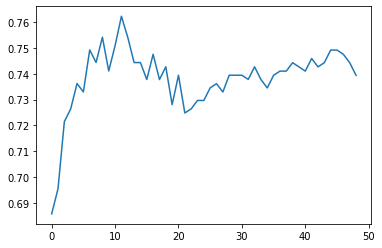

In [159]:
scor=[]
for k in range(1,50):
  scorek=cross_val_score(KNeighborsClassifier(k),X_train,y_train,cv=5).mean()
  scor.append(scorek)
plt.plot(scor)

In [162]:
def predict_Diabetes(model,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
  x=np.array([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]).reshape(1,-1)
  k= scaler.transform(x)
  M=model.predict(k)
  print(M)
  if (M == 1):
   print('We\'are sorry but your results show that u have Diabetes')
  elif (M==0) :
   print("congratulations you don't have diabets")


In [165]:
predict_Diabetes(model,7,	137,	90,	41,	1,33	,0.391,	10)

[0]
congratulations you don't have diabets


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
